# Plot some first SPECS Calculations for Eriswil


In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
import json
import glob
import numpy as np
import xarray as xr
from tqdm.auto import tqdm

import thermodynamic_variables as td
import vizz 

from typing import Dict


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import re
from ipywidgets import interact, widgets, fixed

import datetime
import importlib

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'mycmap', [
        (0, 'white'), (0.2, 'blue'), (0.4, 'cyan'), (0.5, 'lime'), 
        (0.6, 'yellow'), (0.9, 'red'), (1, 'purple')
        ]
    ) 

# List Available COSMO-SPECS NetCDF Output Files

In [3]:
test_case = 'cs-eriswil__20230821_172639'
#test_case = 'cs-eriswil__20230831_095704'
#test_case = 'cs-eriswil__20230831_154758'

root_path = f'/work/bb1262/user/schimmel/cosmo-specs-torch/'

plots_path = root_path + '/python/plots/'
data_path = root_path + f'/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/{test_case}/'



file_paths = glob.glob( data_path + '*.nc' )
print('all nc files:')
sorted(file_paths)



all nc files:


['/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_172639.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_172722.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_172859.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_172929.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_173020.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_173051.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D

# Load files from Meta Data

In [4]:
meta_path = data_path + f'{test_case}.json'

with open(meta_path) as f:
   metadata = json.load(f)

d3_files = [data_path + '3D_' + file + '.nc' for file in metadata.keys()]
d3_files

['/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_172639.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_172722.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_172859.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_172929.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_173020.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D_20230821_173051.nc',
 '/work/bb1262/user/schimmel/cosmo-specs-torch//cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/cs-eriswil__20230821_172639/3D

# Read NetCDF Files

In [5]:

importlib.reload(vizz)

data = vizz.read_file_list(d3_files, varnames=['nf', 'vt', 'ut', 'wt', 't', 'rho', 'qw'])
date_list = list(data.keys())
date_list

['3D_20230821_172639',
 '3D_20230821_172722',
 '3D_20230821_172859',
 '3D_20230821_172929',
 '3D_20230821_173020',
 '3D_20230821_173051',
 '3D_20230821_173224',
 '3D_20230821_173311',
 '3D_20230821_173350',
 '3D_20230821_173420',
 '3D_20230821_173511',
 '3D_20230821_173542']

# Plot a horizontal slice of the entire domain

46.999900000000004 47.1599 7.7707 7.9307


/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/python/vizz.py:511: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.subplots_adjust(hspace=0.3, wspace=0.15, left=0.13, right=0.9, top=0.82, bottom=0.17)  # make space for colorbar


0it [00:00, ?it/s]

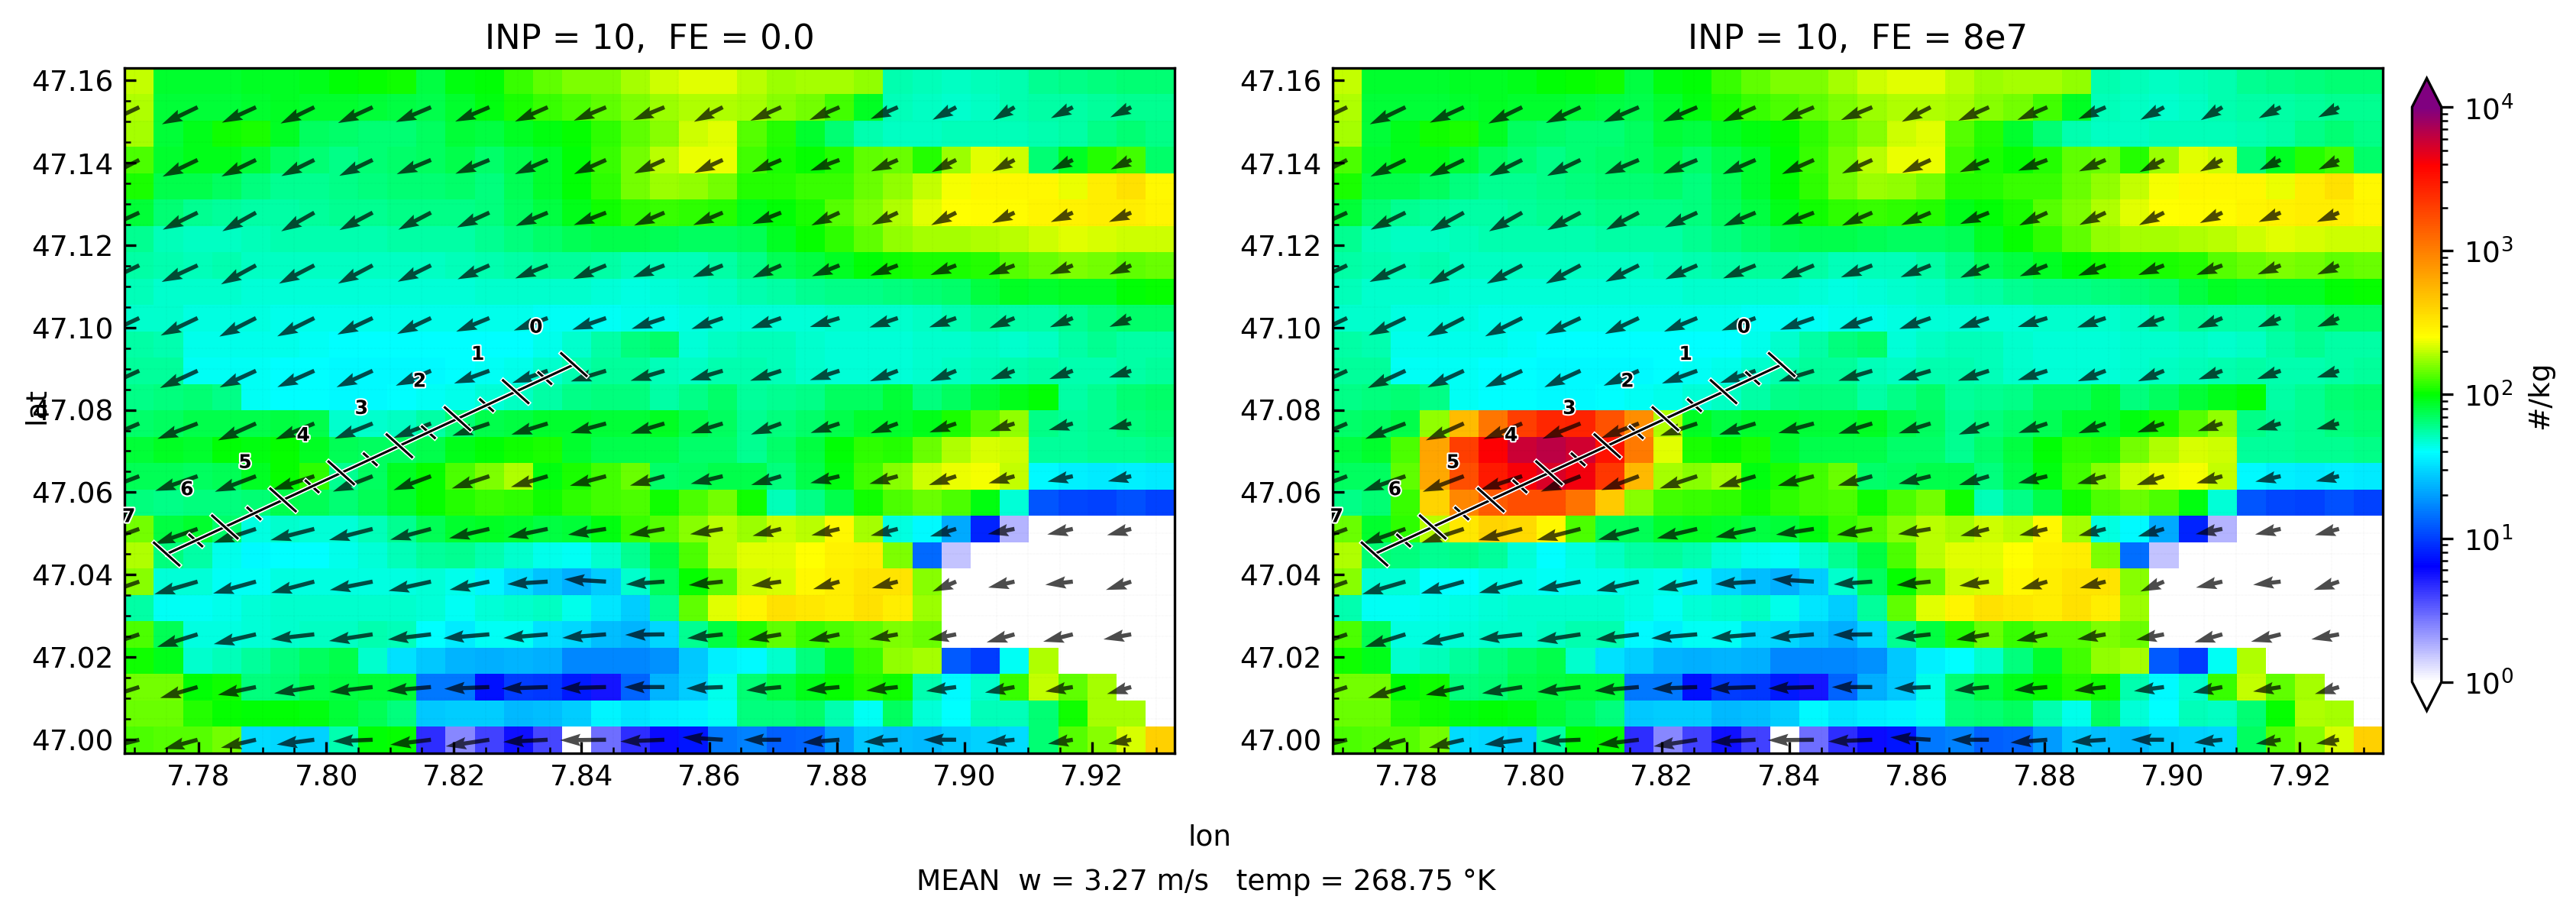

In [6]:

importlib.reload(vizz)

key = next(iter(data))
var_name = 'nf'

plot1 = vizz.MultiPanelPlot(
    data, 
    metadata    = metadata,
    varname     = var_name, 
    nrows       = 1, 
    ncols       = 2, 
    mode        = 'area', 
    vmin        = 1.0, 
    vmax        = 1.0e4,
    timeframe   = 'single', # 'all', 'single'
    timestep0   = 400,
    latlon      = True,
    windvectors = True
    )



# Define start and end points for the ruler
lat_start, lon_start = 47.045, 7.775
lat_end, lon_end = 47.0910, 7.8388
iha, ihe = 41, 49

plot1.add_ruler(lat_start, lon_start, lat_end, lon_end)

# save all frames to individual pngs
for i in tqdm(range(41, 41)):

    tit = f"{data[key].time.values[i]}"
    dt0 = datetime.datetime.strptime(metadata[key[3:]]["RUNCTL.ydate_ini"], "%Y%m%d%H")
    dti = dt0 + i*datetime.timedelta(seconds=15)
    tit = f'{str(dti)} - height: {plot1.height[ihe]:.3f} - {plot1.height[iha]:.3f} [km]\n\
          sum of {data[next(iter(data))][var_name].attrs["long_name"]} ({var_name})'
    
    plot1.display(timestep=i, title=tit)
    plot1.save_figure(f'/{plots_path}/{str(i).zfill(3)}_nf.png')

# Create the meteogram station list from the connecting line or two points in lat-lon space

In [7]:
# Compute the indices in a 2D domain that a straight line crosses.
idX, idY = vizz.line_indices(plot1.y, plot1.x, lat_start, lon_start, lat_end, lon_end)

print('Print Metegoram station list for track along the flare emission plume\n')
print(' i   j      lat      lon   station_name' )
print('---------------------------------------' )
for i in range(0, idX.shape[0], 2):
    print( f'{idX[i]:2d},' , f'{idY[i]:2d},' , f'{plot1.y[idY[i]]:.4f}', ',' , f'{plot1.x[idX[i]]:.4f}', ',' , f"'{str(i).zfill(2)}-' ,")


Print Metegoram station list for track along the flare emission plume

 i   j      lat      lon   station_name
---------------------------------------
 0,  7, 47.0447 , 7.7707 , '00-' ,
 2,  8, 47.0511 , 7.7798 , '02-' ,
 4,  9, 47.0575 , 7.7890 , '04-' ,
 6, 10, 47.0639 , 7.7981 , '06-' ,
 8, 11, 47.0703 , 7.8073 , '08-' ,
10, 12, 47.0767 , 7.8164 , '10-' ,
12, 13, 47.0831 , 7.8256 , '12-' ,
14, 14, 47.0895 , 7.8347 , '14-' ,


# Single spectra from 3D output

46.999900000000004 47.1599 7.7707 7.9307


/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/python/vizz.py:571: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.subplots_adjust(hspace=0.3, wspace=0.15, left=0.6, right=0.88, top=0.95, bottom=0.05)  # make space for colorbar


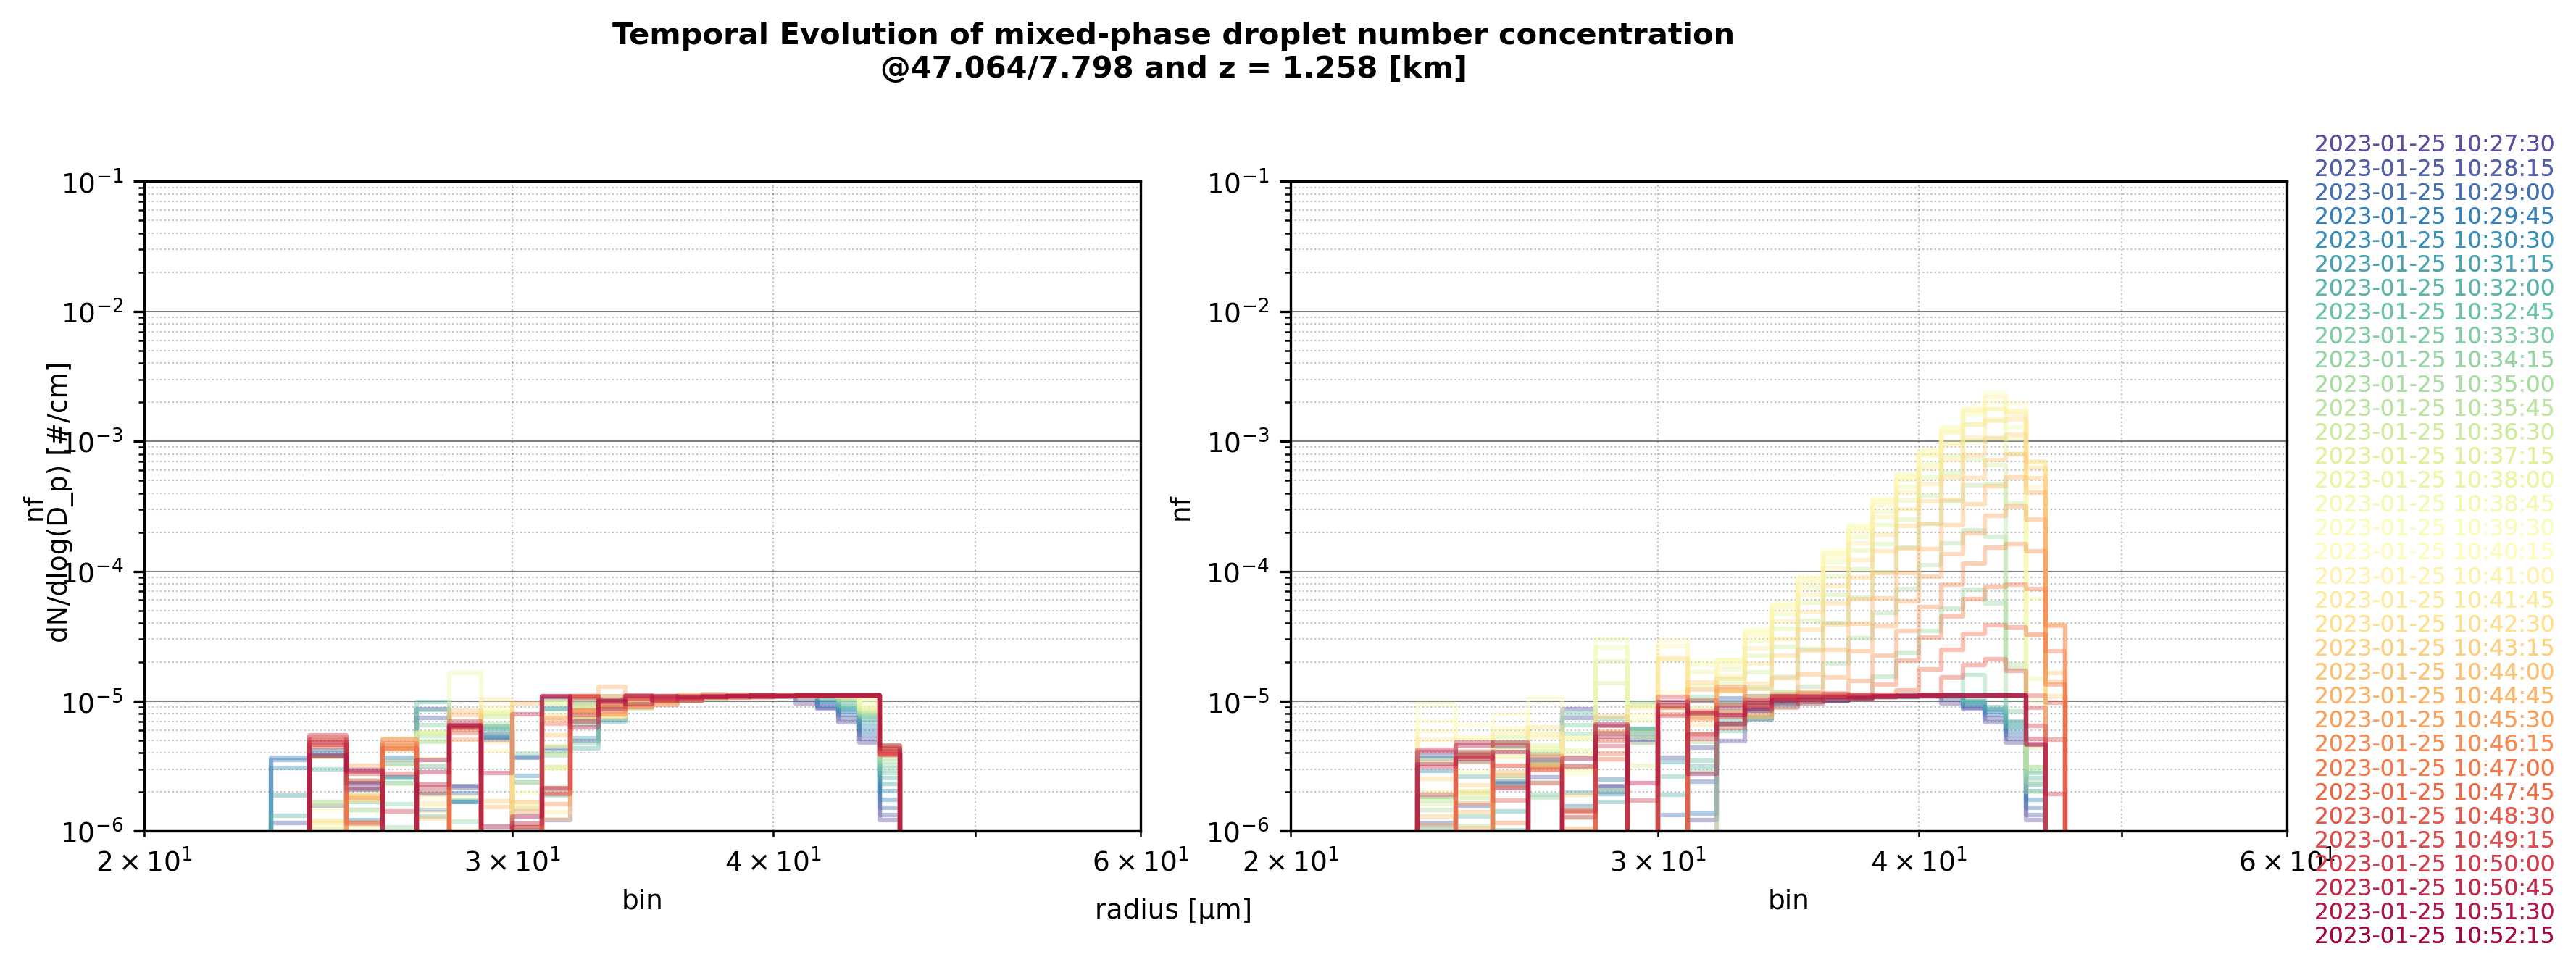

In [8]:

importlib.reload(vizz)
plot11 = vizz.MultiPanelPlot(
    data, 
    metadata    = metadata,
    varname     = var_name, 
    nrows       = 1, 
    ncols       = 2, 
    mode        = 'single_spectra', 
    ymin        = 1.0e-6, 
    ymax        = 1.0e-1,
    xmin        = 2.0e+1, 
    xmax        = 6.0e+1,
    idX         = 6,
    idY         = 10,
    timeframe   = 'intervall', # 'all', 'single'
    timestep0   = [350, 450],
    latlon      = True,
)

# Plot a single profile for a specific location

/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/python/vizz.py:454: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.subplots_adjust(hspace=0.3, wspace=0.15, left=0.13, right=0.9, top=0.82, bottom=0.17)  # make space for colorbar


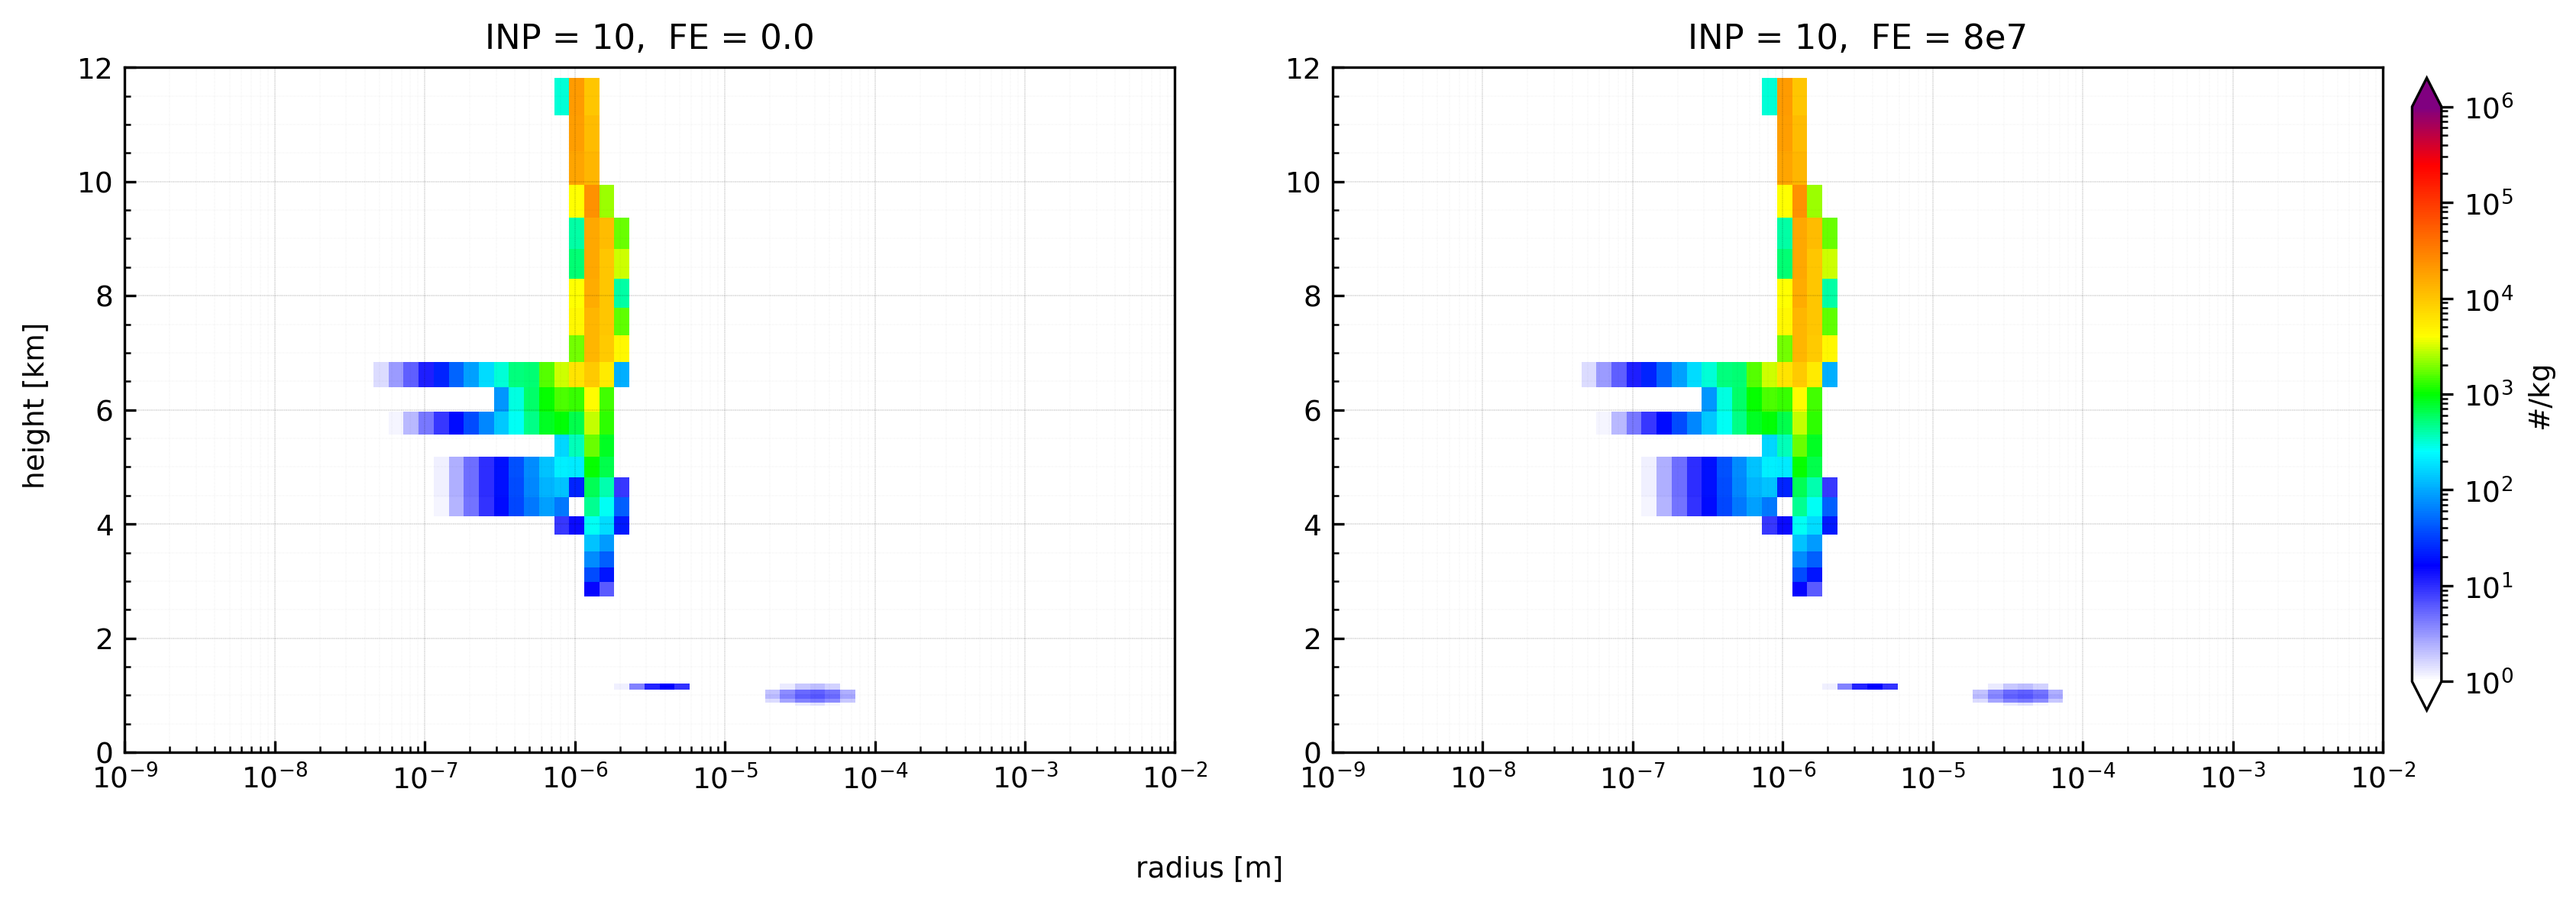

In [9]:

importlib.reload(vizz)

plot2 = vizz.MultiPanelPlot(
    data, 
    metadata    = metadata,
    varname     = 'nf', 
    nrows       = 1, 
    ncols       = 2, 
    mode        = 'profile',
    ymin        = 0, 
    ymax        = 12,
    vmin        = 1, 
    vmax        = 1.0e6,
    grid        = True,
    )

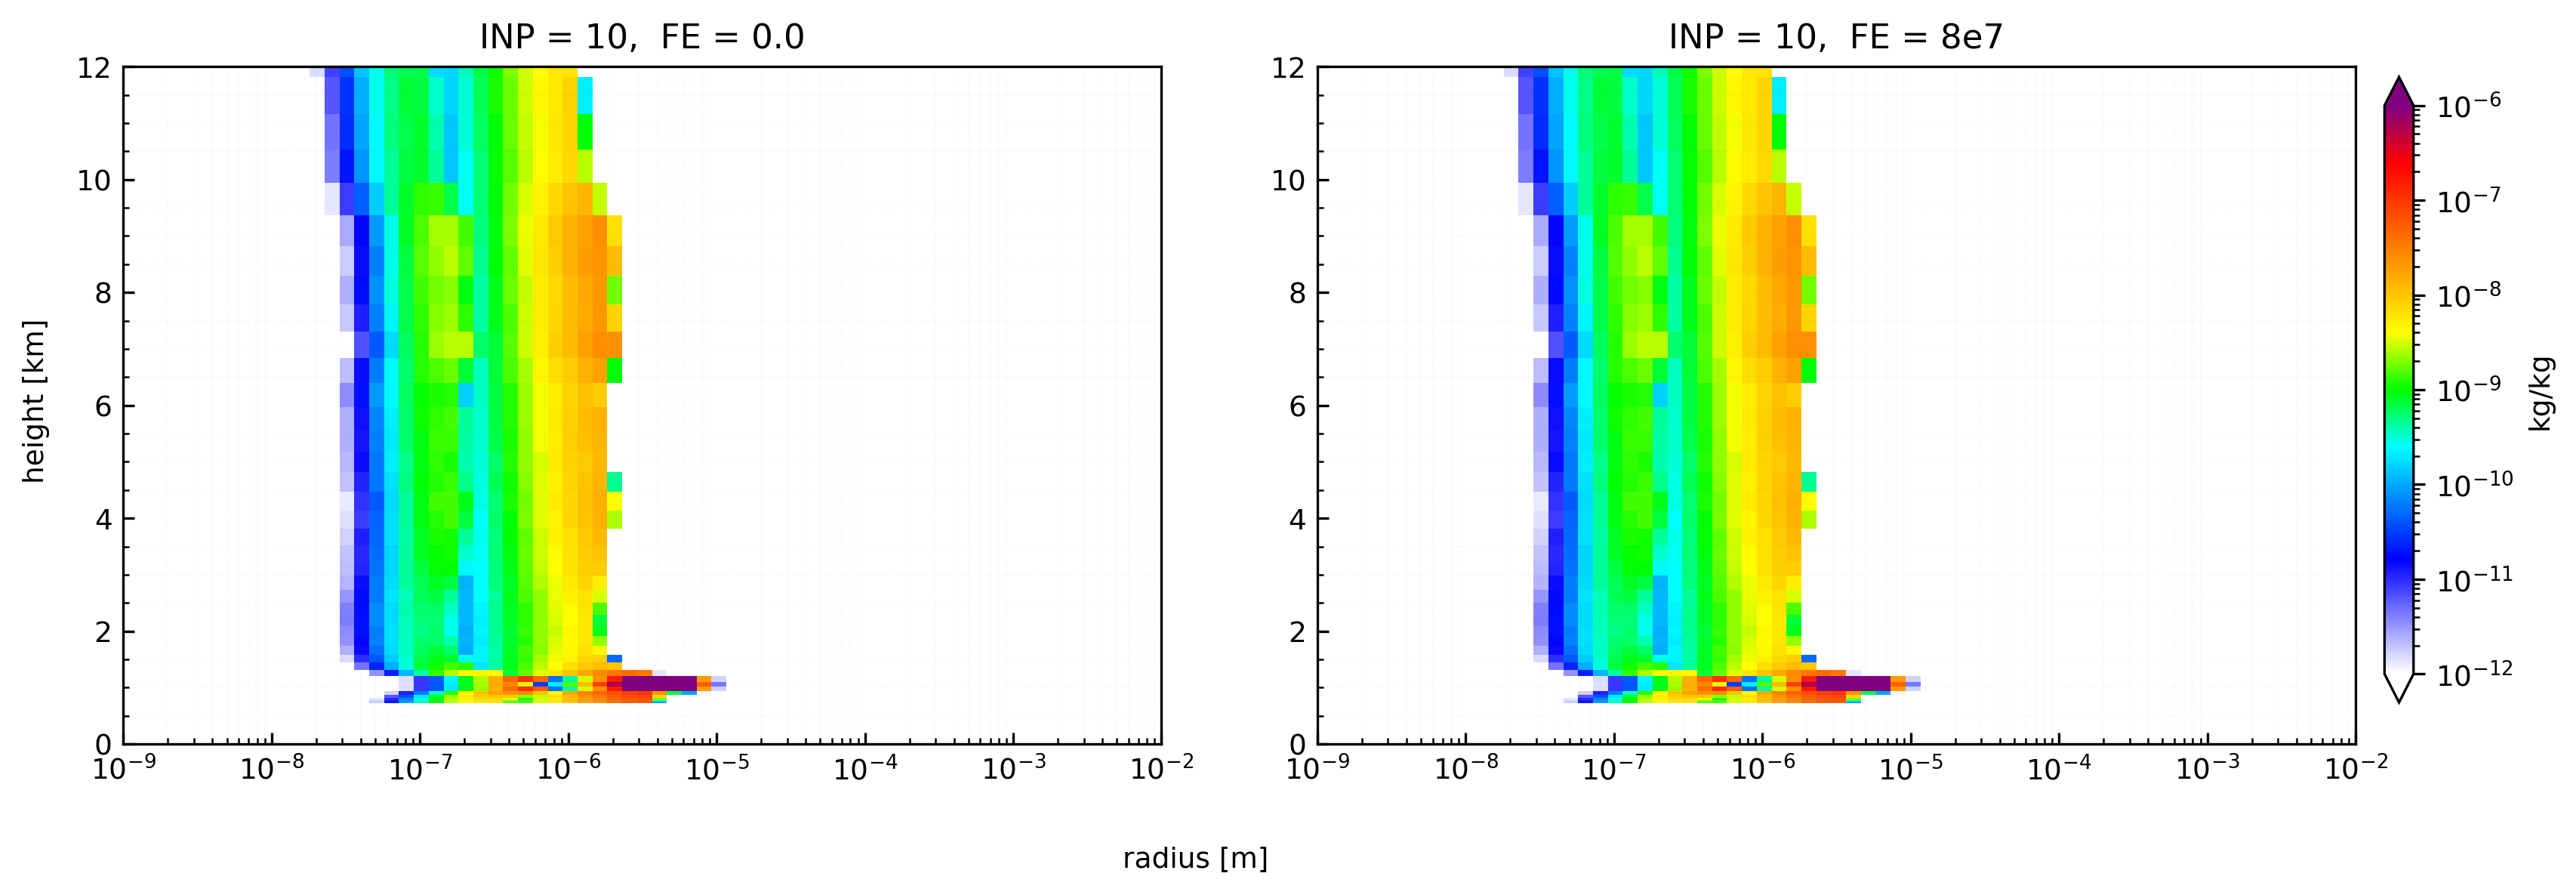

In [10]:
plot3 = vizz.MultiPanelPlot(
    data, 
    metadata    = metadata,
    varname     = 'qw', 
    nrows       = 1, 
    ncols       = 2, 
    mode        = 'profile',
    ymin        = 0, 
    ymax        = 12,
    vmin        = 1e-12, 
    vmax        = 1e-6,
    )
    

# Plot a time series of a specific location
## NOTE: A 3x4 plot takes approx. 25 min 

46.999900000000004 47.1599 7.7707 7.9307


/work/bb1262/user/schimmel/cosmo-specs-torch/cosmo-specs/testcases/RUN_ERISWILL_TESTCASE01/python/vizz.py:479: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self.fig.subplots_adjust(hspace=0.3, wspace=0.15, left=0.13, right=0.9, top=0.82, bottom=0.17)  # make space for colorbar


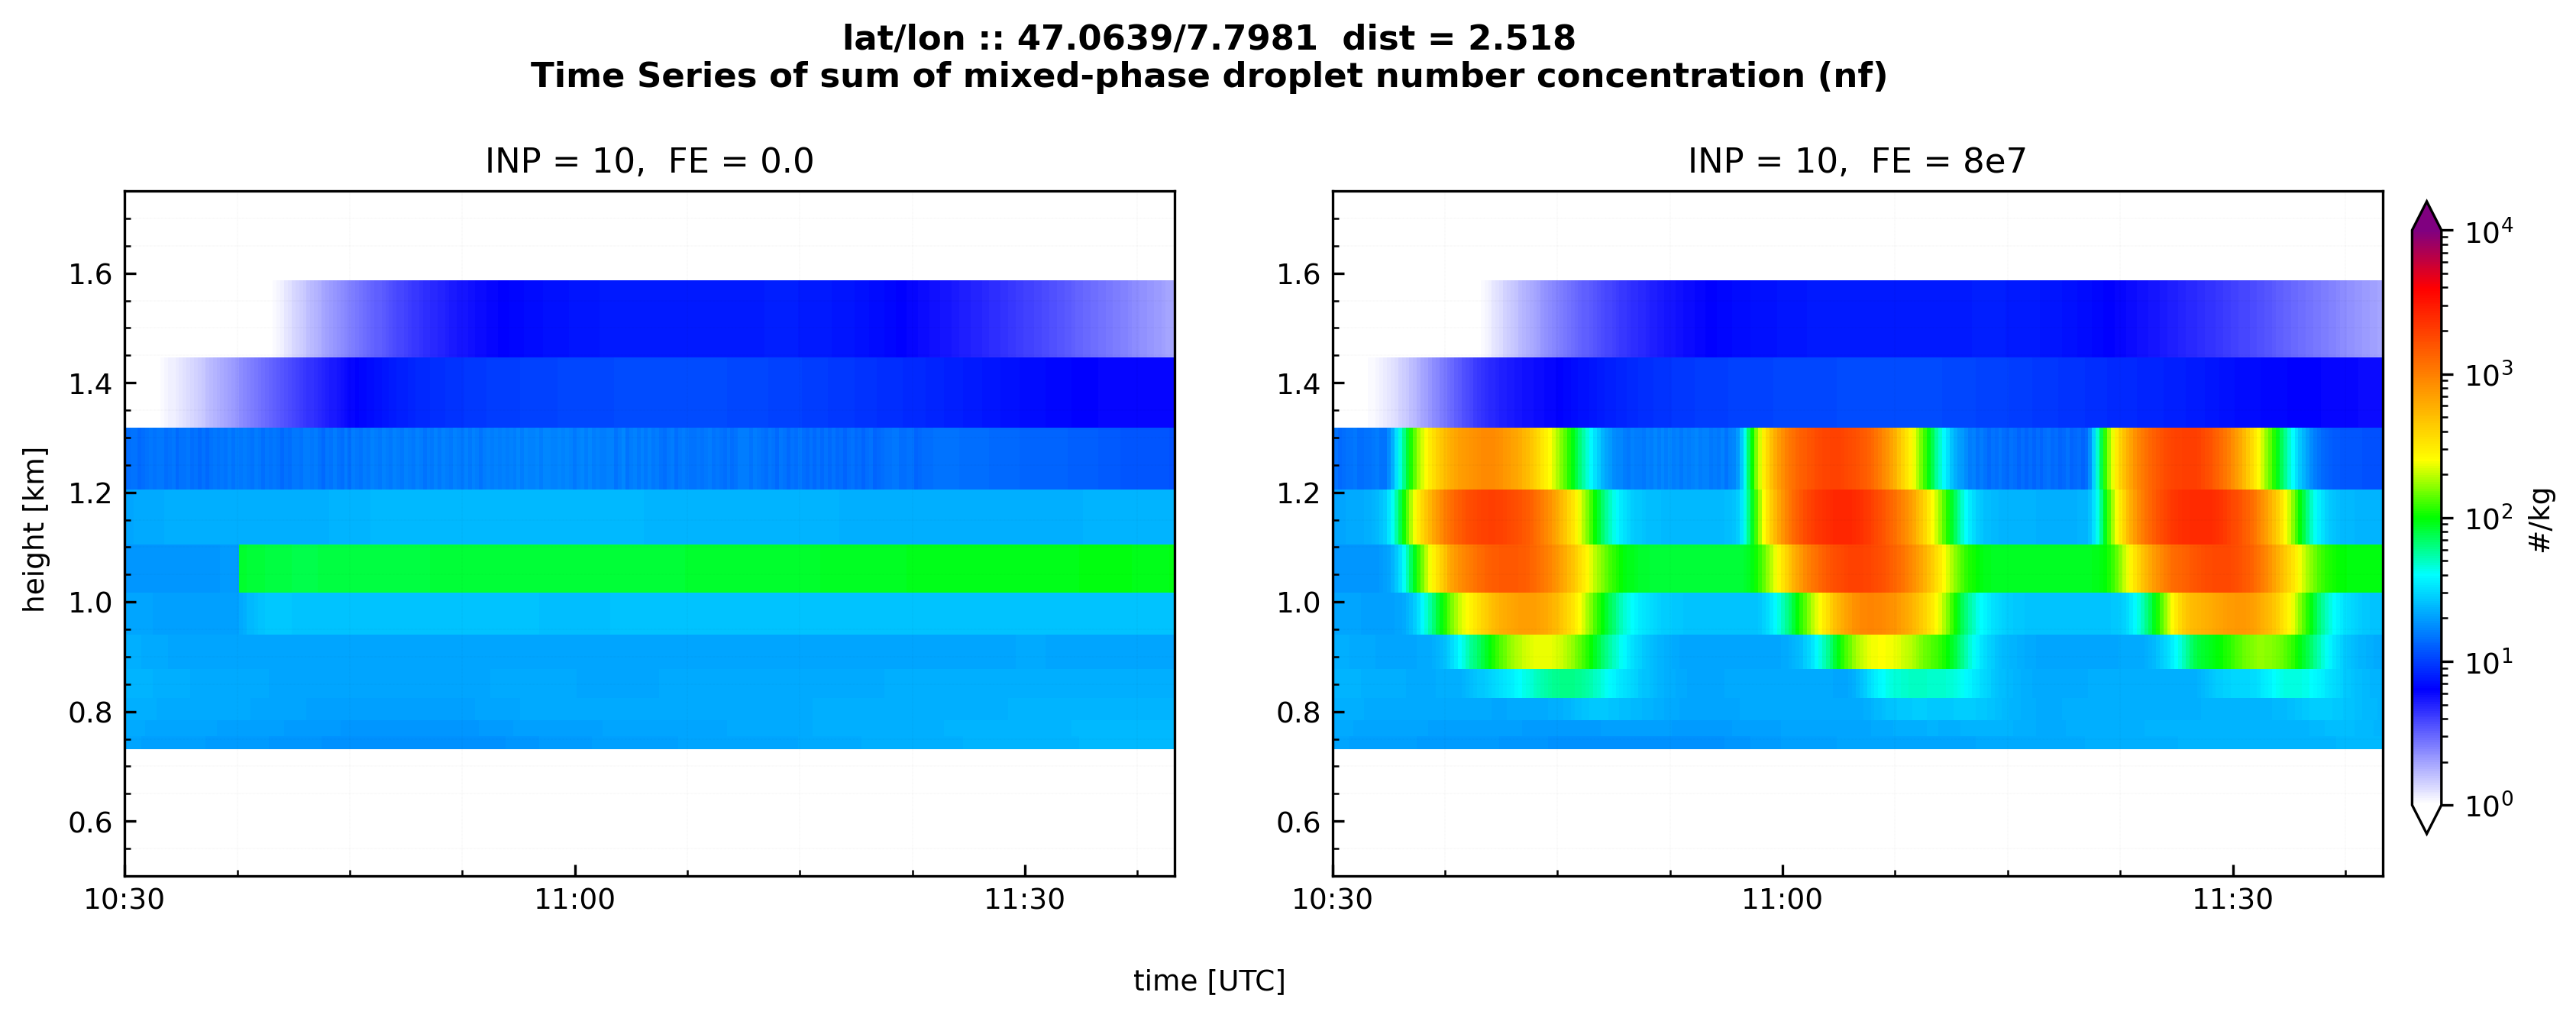

In [12]:
importlib.reload(vizz)


iidX, iidY = 6, 10
var_name = 'nf'

plot5 = vizz.MultiPanelPlot(
    data, 
    metadata    = metadata,
    varname     = var_name, 
    nrows       = 1, 
    ncols       = 2, 
    mode        = 'timeseries',
    ymin        = 0.5, 
    ymax        = 1.75,
    latlon      = True,
    idX         = iidX,
    idY         = iidY,
    )

# add figure title
name = data[next(iter(data))]['nf'].attrs["long_name"]
lat, lon = plot5.y[iidY], plot5.x[iidX]
dist = vizz.haversine_distance(plot5.y[12], plot5.x[12], plot5.y[iidY], plot5.x[iidX]) * 1.0e-3
plot5.fig.suptitle(
    f'lat/lon :: {lat:.4f}/{lon:.4f}  dist = {dist:.3f}\nTime Series of sum of {name} ({var_name})', weight='bold')
for iax in plot5.axes.flatten():
    iax.set_xlim(datetime.datetime(2023, 1, 25, 10, 30), datetime.datetime(2023, 1, 25, 11, 40))
    
plot5.save_figure(f'/{plots_path}/{str(i).zfill(3)}_single_spectra.png')

# Compute the resolution of the simulation in meter

In [ ]:
# distance between to grid points
lat_start, lon_start = 47.045, 7.775
lat_end, lon_end = 47.0910, 7.8388

dx = vizz.haversine_distance(lat_start, lon_start, lat_start, lon_start+0.005)
dy = vizz.haversine_distance(lat_start, lon_start, lat_start+0.005, lon_start)

print(dx, dy)
